<img src="https://www.tu-darmstadt.de/media/resources/images_1/tu_logo_web.svg" width="300">

## Data from NOAA's National Data Buoy Center (NDBC)

NOAA (National Oceanic and Atmospheric Administration) is the agency of the United States responsible for the collection, storage, and dissemination of oceanograpphic and atmospheric data.

The National Data Buoy Center (NDBC) is a network of buoy stations that monitor the environmental conditions and wave height of the ocean along the coasts of the United States.

Sources:
- https://www.ncei.noaa.gov/access/metadata/landing-page/bin/iso?id=gov.noaa.nodc:NDBC-CMANWx
- https://www.ndbc.noaa.gov/data/historical/stdmet/

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

### Name: Augustine M Gbondo
### Matriculation number : 2331706

# 1. INTRODUCTION

## Objective
To predict the 'Ambient Temperature (AT)' of a Combined Cycle Power Plant (CCCP)

Societal and Economic benefits: Analysis of the ambient temperature of a CCCP is essential in effeciciency of a Power plant. 

## Introduction to the Dataset
The dataset contains 9568 data points collected from a Combined Cycle Power Plant over 6 years (2006-2011), when the power plant was set to work with full load. Features consist of hourly average ambient variables Temperature (AT), Ambient Pressure (AP), Relative Humidity (RH) and Exhaust Vacuum (V) to predict the net hourly electrical energy output (PE) of the plant.

## Problem statement
The ambient temperature of a CCCP is essential in regulating a power plant working at full load. This is required to preventing disasters and energy savings.

In [11]:
import requests
from requests.auth import HTTPBasicAuth
from bs4 import BeautifulSoup

In [14]:
# download the dataset as zip file from web directory
import requests

downloadUrl = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00294/CCPP.zip'

req = requests.get(downloadUrl)
filename = req.url[downloadUrl.rfind('/')+1:]

with open(filename, 'wb') as f:
    for chunk in req.iter_content(chunk_size=8192):
        if chunk:
            f.write(chunk)

In [18]:
import zipfile
import os

os.listdir()

['.git',
 '.ipynb_checkpoints',
 'CCPP.zip',
 'data_df.png',
 'Folds5x2_pp.ods',
 'Folds5x2_pp.xlsx',
 'Gbondo_2331706_Final_project.ipynb',
 'Readme.txt',
 'Readme.txt~']

In [20]:
# extract zipfile to folder
with zipfile.ZipFile('CCPP.zip') as f:
    f.extractall()

In [28]:
# reading a specific sheet in zipfile
## openpyxl is used for manipulating xcel data
from openpyxl import Workbook, load_workbook

# load in the workbook
xl_data = pd.ExcelFile('CCPP/Folds5x2_pp.xlsx')
data = xl_data.parse('Sheet5')

# read the data
data.head()

,AT,V,AP,RH,PE
0,8.34,40.77,1010.84,90.01,480.48
1,23.64,58.49,1011.40,74.20,445.75
2,29.74,56.90,1007.15,41.91,438.76
3,19.07,49.69,1007.22,76.79,453.09
4,11.80,40.66,1017.13,97.20,464.43


### About the Dataset
The dataset contains 9568 data points collected from a <a href="https://en.wikipedia.org/wiki/Combined_cycle_power_plant">Combined Cycle Power Plant</a> over 6 years (2006-2011), when the power plant was set to work with full load. Features consist of hourly average ambient variables `Temperature (T)`, `Ambient Pressure (AP)`, `Relative Humidity (RH)` and `Exhaust Vacuum (V)` to predict the net hourly `electrical energy output (PE)` of the plant.

#### Functionality of a CCPP
A combined cycle power plant (CCPP) is composed of `gas turbines (GT)`, `steam turbines (ST)` and `heat recovery steam generators`. In a CCPP, the electricity is generated by gas and steam turbines, which are combined in one cycle, and is transferred from one turbine to another. While the Vacuum is colected from and has effect on the Steam Turbine, he other three of the ambient variables effect the GT performance.

#### Data Processing
For comparability with our baseline studies, and to allow 5x2 fold statistical tests be carried out, we provide the data shuffled five times. For each shuffling 2-fold CV is carried out and the resulting 10 measurements are used for statistical testing.
We provide the data both in `.ods` and in `.xlsx` formats.

#### Attribute Information:

Features consist of hourly average ambient variables
- `Temperature (T)` in the range 1.81°C and 37.11°C,
- `Ambient Pressure (AP)` in the range 992.89-1033.30 milibar,
- `Relative Humidity (RH)` in the range 25.56% to 100.16%
- `Exhaust Vacuum (V)` in the range 25.36-81.56 cm Hg
- `Net hourly electrical energy output (PE)` 420.26-495.76 MW
The averages are taken from various sensors located around the plant that record the ambient variables every second. The variables are given without normalization.

## Exploratory Data Analysis

<u>Descriptive statistics:</u>

`.mean()`, `.median()`, `.mode()`, `.min()`, `.max()`, `.var()`, `.std()`, `.sum()`, `.quantile()`

In [29]:
## Stats of dataset
data.describe()

,AT,V,AP,RH,PE
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


In [33]:
# exploring the target variable (Net hourly electrical energy output (PE))
print(' The mean of PE is: ', data.PE.mean())
print(' The median of PE is: ', data.PE.median())
print(' The lowest value of PE is: ', data.PE.min())
print(' The highest value of PE is: ', data.PE.max())
print(' The variance of PE is: ', data.PE.var())

 The mean of PE is:  454.3650094063547
 The median of PE is:  451.54999999999995
 The lowest value of PE is:  420.26
 The highest value of PE is:  495.76
 The variance of PE is:  291.28231832331363


<u>For a quick exploration, display a pairplot of `housing_df`</u>

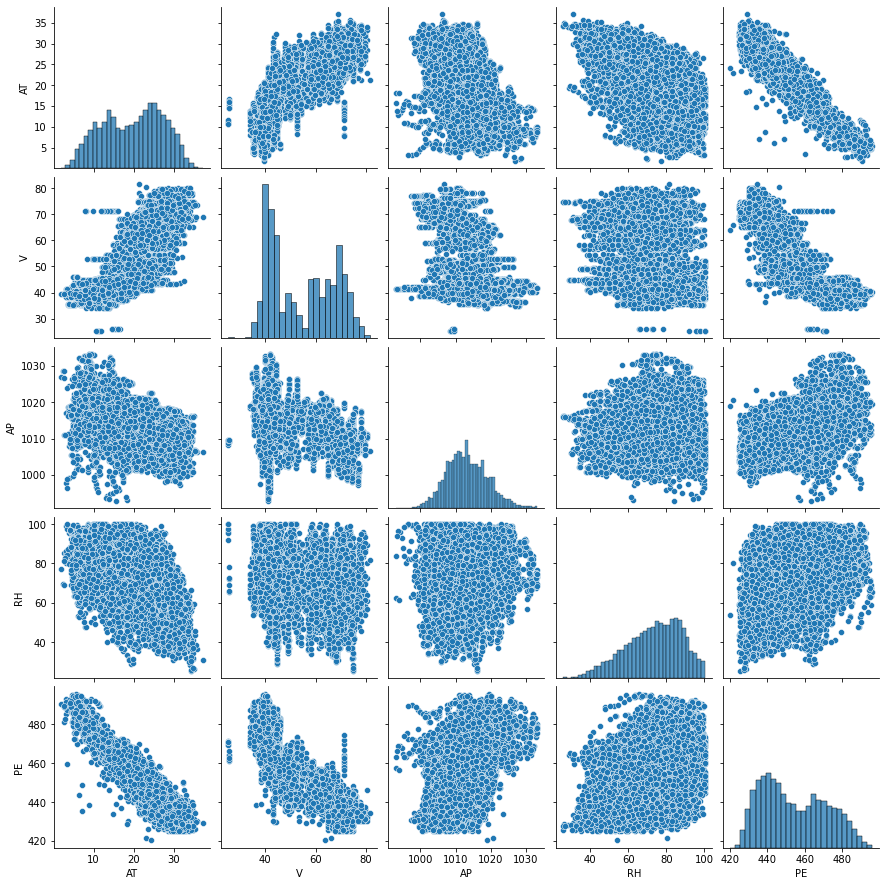

In [34]:
# Use pairplot from seaborn module
sns.pairplot(data)
plt.savefig('data.png')
plt.show()

In [7]:
data_df.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [8]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9568 non-null   float64
 1   V       9568 non-null   float64
 2   AP      9568 non-null   float64
 3   RH      9568 non-null   float64
 4   PE      9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


In [9]:
data_df.isnull().sum()

AT    0
V     0
AP    0
RH    0
PE    0
dtype: int64

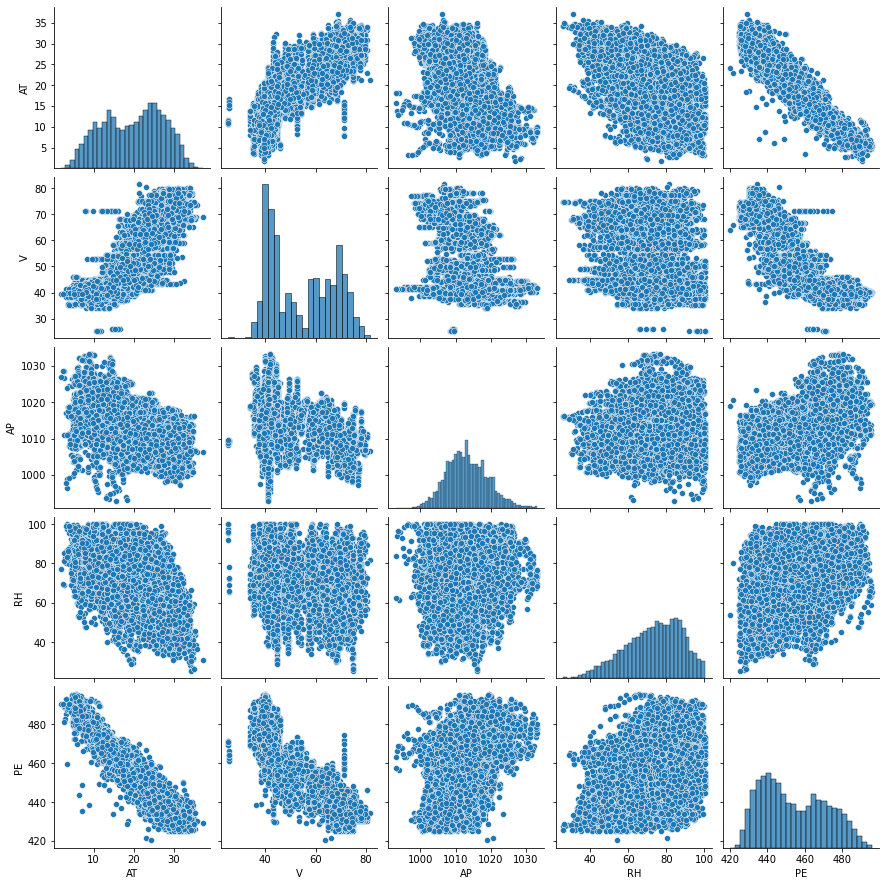

In [10]:
sns.pairplot(data_df)
plt.savefig('data_df.png')
plt.show()

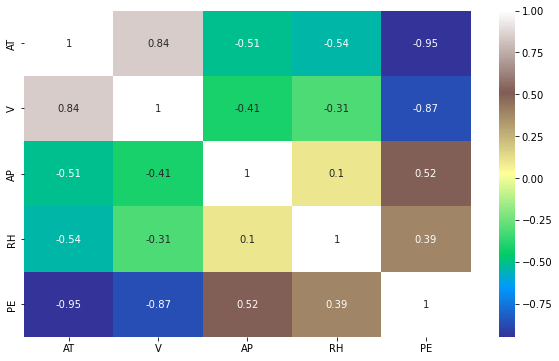

In [11]:
sns.heatmap(data_df.corr(), annot=True, cmap='terrain')
fig= plt.gcf()
fig.set_size_inches(10,6)
plt.show()

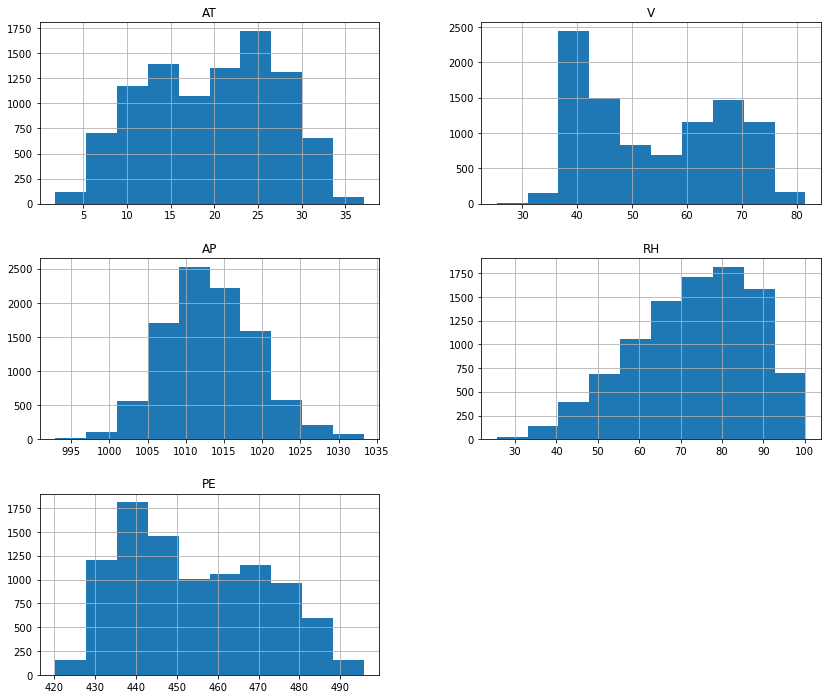

In [12]:
data_df.hist(figsize=(14,12))
plt.show()

<AxesSubplot:>

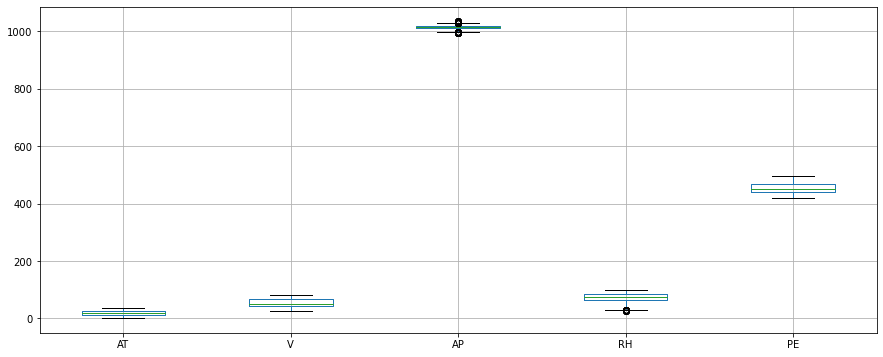

In [13]:
data_df.boxplot(figsize=(15,6))

# 2. HYPOTHESIS TESTING

### NULL HYPOTHESIS
All of the independent variables are unsuitable to be a predictor for AT
H0:β1=β2=...=βp=0
    
### ALTERNATIVE HYPOTHESIS
HA:At least one βi is non−zero, and suitable to be a predictor for AT

Significant level = 1
critical value 0.05

In [14]:
import statsmodels.formula.api as smf

In [1]:
#seperating dependent and independent variables#
## n/b AT = dependent variable, V+AP+RH+PE = independent variable##
reg1 = 'AT~V+AP+RH+PE'

In [2]:
reg1output= smf.ols(reg1, data_df).fit()

NameError: name 'smf' is not defined

In [17]:
print(reg1output.summary2())

                  Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.939     
Dependent Variable: AT               AIC:                38812.7192
Date:               2022-09-12 06:11 BIC:                38848.5501
No. Observations:   9568             Log-Likelihood:     -19401.   
Df Model:           4                F-statistic:        3.690e+04 
Df Residuals:       9563             Prob (F-statistic): 0.00      
R-squared:          0.939            Scale:              3.3808    
--------------------------------------------------------------------
            Coef.    Std.Err.      t      P>|t|    [0.025    0.975] 
--------------------------------------------------------------------
Intercept  243.6788    3.5735    68.1906  0.0000  236.6740  250.6836
V            0.0659    0.0030    21.8399  0.0000    0.0600    0.0718
AP          -0.0724    0.0038   -19.3067  0.0000   -0.0798   -0.0651
RH          -0.1095    0.0014   -77.4384  0.0000   -0.1122  

### SUMMARY
From the summary table above the F-statistic is 3.690e+04
Since the value of F-statistic is larger than 1, this providing strong evidence against the Null Hypothesis (that all coefficients are zero). Hence, we reject the Null Hypothesis and are confident that at least one predictor is useful in predicting the output.

# 3. MODEL

## MODEL CHOICE
An Ordinary Logistic Regression Model was used for this study

In [18]:
x=data_df.drop(['PE'], axis=1).values
y=data_df['PE'].values

In [19]:
print(x)

[[  14.96   41.76 1024.07   73.17]
 [  25.18   62.96 1020.04   59.08]
 [   5.11   39.4  1012.16   92.14]
 ...
 [  31.32   74.33 1012.92   36.48]
 [  24.48   69.45 1013.86   62.39]
 [  21.6    62.52 1017.23   67.87]]


In [20]:
print(y)

[463.26 444.37 488.56 ... 429.57 435.74 453.28]


## Model Building

In [21]:
from sklearn.linear_model import LinearRegression
sk_model = LinearRegression()

In [22]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3, random_state=0)

In [23]:
from sklearn.linear_model import LinearRegression
ml=LinearRegression()
ml.fit(x_train,y_train)

LinearRegression()

In [24]:
y_pred=ml.predict(x_test)
print(y_pred)

[431.40245096 458.61474119 462.81967423 ... 432.47380825 436.16417243
 439.00714594]


In [25]:
ml.predict([[14.96,41.76,1024.07,73.17]])

array([467.34820092])

### Model performance

In [26]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9304112159477682

Text(0.5, 1.0, 'Actual vs. Predicted')

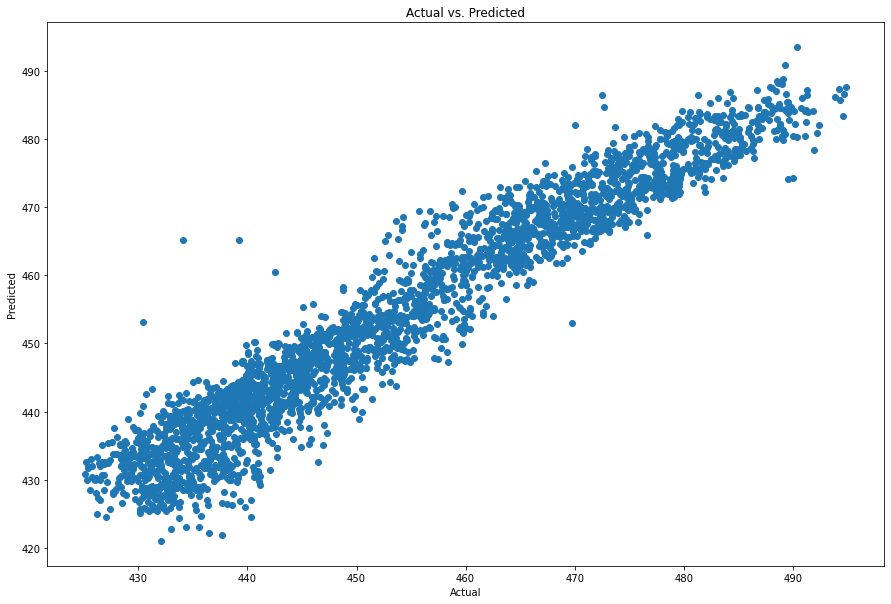

In [27]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
plt.scatter(y_test, y_pred)A
plt.xlabel ('Actual')
plt.ylabel ('Predicted')
plt.title('Actual vs. Predicted')

# CONCLUSION
The model shows that Temperature (AT), Ambient Pressure (AP), Relative Humidity (RH) and Exhaust Vacuum (V) to predict the net hourly electrical energy output (PE) of the plant. In short we can infer that there is a moderator relationship between the former and the latters. Despite this being a good predictor, the model is limited to predict values within the time span of the data, therefore any data outside the time period is not certain to be predicted with the accuracately. Machine Learning applications in the energy sector is important as it reduces cost of continous supervision and parameters can be predicted within appreciable accuracy levels.

# REFERENCES
1. Dataset: https://archive.ics.uci.edu/ml/datasets/combined+cycle+power+plant
2. OLS details: https://www.youtube.com/watch?v=6biU48ZAx3o